In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# 1.Data Collection

In [2]:
now = datetime.now()

In [3]:
start = datetime(now.year-10,now.month,now.day)
end = now
ticker = 'AAPL'
df = yf.download(ticker,start,end)
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2016-02-04,21.898483,22.063969,21.578848,21.730731,185886800
2016-02-05,21.313620,21.971028,21.238812,21.880351,185672400
2016-02-08,21.538046,21.694462,21.091462,21.111863,216085600
2016-02-09,21.533503,21.748861,21.293209,21.374819,177324800
2016-02-10,21.370291,21.841811,21.331753,21.744334,169374400
...,...,...,...,...,...
2026-01-28,256.440002,258.859985,254.509995,257.649994,41288000
2026-01-29,258.279999,259.649994,254.410004,258.000000,67253000


# 2.Data Exploration.

In [4]:
df.head()


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2016-02-04,21.898483,22.063969,21.578848,21.730731,185886800
2016-02-05,21.313620,21.971028,21.238812,21.880351,185672400
2016-02-08,21.538046,21.694462,21.091462,21.111863,216085600
2016-02-09,21.533503,21.748861,21.293209,21.374819,177324800
2016-02-10,21.370291,21.841811,21.331753,21.744334,169374400


In [5]:
df.columns

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [6]:
df.isna().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [7]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2514.000000,2514.000000,2514.000000,2514.000000,2.514000e+03
mean,116.362450,117.516393,115.092992,116.253274,1.000240e+08
std,74.058810,74.765684,73.279722,73.991385,5.590989e+07
min,20.604076,20.907414,20.405654,20.526533,1.791060e+07
25%,41.986069,42.454552,41.777919,42.009237,6.083100e+07
50%,122.596050,123.947520,121.245170,122.582235,8.793800e+07
75%,172.914688,175.017870,171.360860,172.839534,1.221440e+08
max,286.190002,288.619995,283.299988,286.200012,4.584084e+08


In [8]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2016-02-04,21.898483,22.063969,21.578848,21.730731,185886800
2016-02-05,21.313620,21.971028,21.238812,21.880351,185672400
2016-02-08,21.538046,21.694462,21.091462,21.111863,216085600
2016-02-09,21.533503,21.748861,21.293209,21.374819,177324800
2016-02-10,21.370291,21.841811,21.331753,21.744334,169374400


In [9]:
df.reset_index(inplace=True)

In [10]:
df

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2016-02-04,21.898483,22.063969,21.578848,21.730731,185886800
1,2016-02-05,21.313620,21.971028,21.238812,21.880351,185672400
2,2016-02-08,21.538046,21.694462,21.091462,21.111863,216085600
3,2016-02-09,21.533503,21.748861,21.293209,21.374819,177324800
4,2016-02-10,21.370291,21.841811,21.331753,21.744334,169374400
...,...,...,...,...,...,...
2509,2026-01-28,256.440002,258.859985,254.509995,257.649994,41288000
2510,2026-01-29,258.279999,259.649994,254.410004,258.000000,67253000
2511,2026-01-30,259.480011,261.899994,252.179993,255.169998,92443400


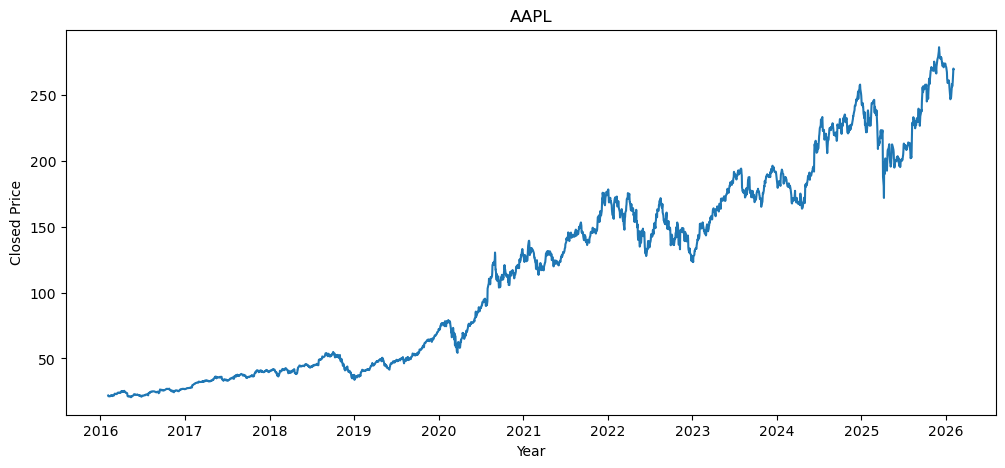

In [11]:
plt.figure(figsize=(12,5))
plt.plot(df.Date,df['Close'])
plt.title(ticker)
plt.xlabel('Year')
plt.ylabel('Closed Price');

# 3.Feature Enginnering.

### 100 Days Moving Average of Close Price.

In [12]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2016-02-04,21.898483,22.063969,21.578848,21.730731,185886800
1,2016-02-05,21.313620,21.971028,21.238812,21.880351,185672400
2,2016-02-08,21.538046,21.694462,21.091462,21.111863,216085600
3,2016-02-09,21.533503,21.748861,21.293209,21.374819,177324800
4,2016-02-10,21.370291,21.841811,21.331753,21.744334,169374400


In [13]:
df['MA_100'] = df.Close.rolling(100).mean()

In [14]:
df.head(103)

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2016-02-04,21.898483,22.063969,21.578848,21.730731,185886800,NaN
1,2016-02-05,21.313620,21.971028,21.238812,21.880351,185672400,NaN
2,2016-02-08,21.538046,21.694462,21.091462,21.111863,216085600,NaN
3,2016-02-09,21.533503,21.748861,21.293209,21.374819,177324800,NaN
4,2016-02-10,21.370291,21.841811,21.331753,21.744334,169374400,NaN
...,...,...,...,...,...,...,...
98,2016-06-24,21.301983,21.589355,21.130928,21.190228,301245600,NaN
99,2016-06-27,20.991802,21.222156,20.868643,21.210752,181958400,22.717469
100,2016-06-28,21.345314,21.361281,21.014609,21.187945,161779600,22.711937


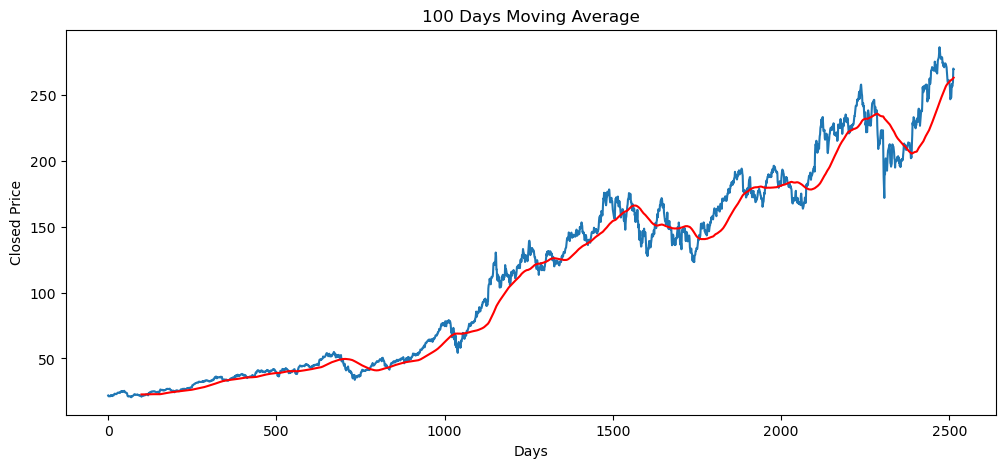

In [15]:
plt.figure(figsize=(12,5))
plt.plot(df['Close'])
plt.plot(df['MA_100'],'r');
plt.title('100 Days Moving Average')
plt.xlabel('Days')
plt.ylabel('Closed Price');

### 200 Days Moving Average. 

In [16]:
df['MA_200'] = df.Close.rolling(200).mean()

In [17]:
df.head(203)

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2016-02-04,21.898483,22.063969,21.578848,21.730731,185886800,NaN,NaN
1,2016-02-05,21.313620,21.971028,21.238812,21.880351,185672400,NaN,NaN
2,2016-02-08,21.538046,21.694462,21.091462,21.111863,216085600,NaN,NaN
3,2016-02-09,21.533503,21.748861,21.293209,21.374819,177324800,NaN,NaN
4,2016-02-10,21.370291,21.841811,21.331753,21.744334,169374400,NaN,NaN
...,...,...,...,...,...,...,...,...
198,2016-11-15,24.687294,24.818671,24.468334,24.562832,129058000,24.707337,NaN
199,2016-11-16,25.351088,25.406405,24.569742,24.592790,235362000,24.750930,23.734199
200,2016-11-17,25.341875,25.434070,25.083732,25.309607,110528000,24.790895,23.751416


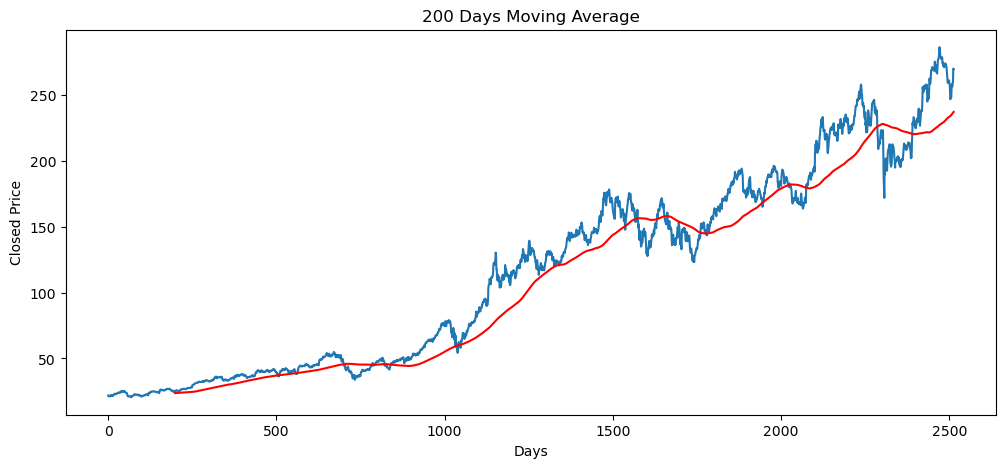

In [18]:
plt.figure(figsize=(12,5))
plt.plot(df['Close'])
plt.plot(df['MA_200'],'r');
plt.title('200 Days Moving Average')
plt.xlabel('Days')
plt.ylabel('Closed Price');

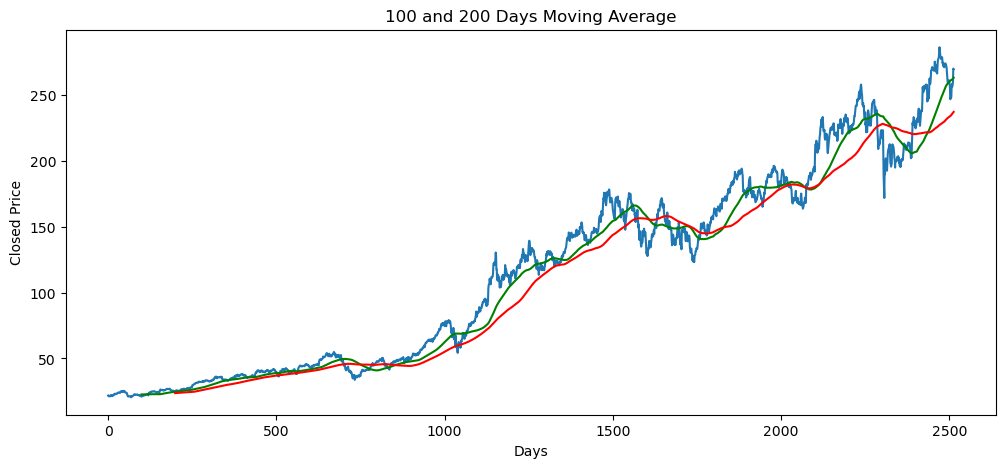

In [19]:
plt.figure(figsize=(12,5))
plt.plot(df['Close'])
plt.plot(df['MA_100'],'g')
plt.plot(df['MA_200'],'r');
plt.title('100 and 200 Days Moving Average')
plt.xlabel('Days')
plt.ylabel('Closed Price');

In [20]:
df['Percentage Changed'] = df.Close.pct_change()
df.head()

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200,Percentage Changed
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,,
0,2016-02-04,21.898483,22.063969,21.578848,21.730731,185886800,NaN,NaN,NaN
1,2016-02-05,21.313620,21.971028,21.238812,21.880351,185672400,NaN,NaN,-0.026708
2,2016-02-08,21.538046,21.694462,21.091462,21.111863,216085600,NaN,NaN,0.010530
3,2016-02-09,21.533503,21.748861,21.293209,21.374819,177324800,NaN,NaN,-0.000211
4,2016-02-10,21.370291,21.841811,21.331753,21.744334,169374400,NaN,NaN,-0.007579


In [21]:
df[['Close','Percentage Changed']]

Price,Close,Percentage Changed
Ticker,AAPL,
0,21.898483,NaN
1,21.313620,-0.026708
2,21.538046,0.010530
3,21.533503,-0.000211
4,21.370291,-0.007579
...,...,...
2509,256.440002,-0.007086
2510,258.279999,0.007175
2511,259.480011,0.004646


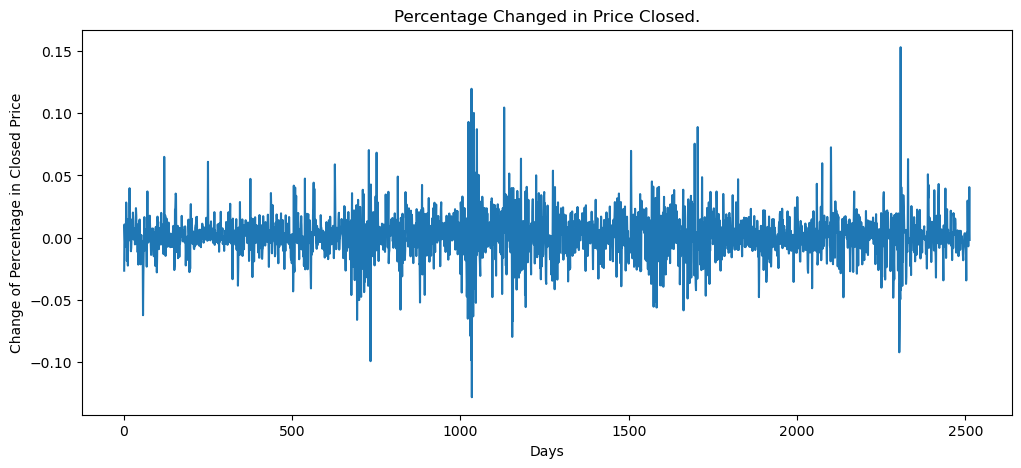

In [22]:
plt.figure(figsize=(12,5))
plt.plot(df['Percentage Changed']);
plt.xlabel('Days')
plt.ylabel('Change of Percentage in Closed Price');
plt.title('Percentage Changed in Price Closed.');

# 4.Data Preprocessing.

In [23]:
df.shape

(2514, 9)

In [24]:
# Spitting the data into training and testing data.

In [25]:
data_training = pd.DataFrame(df.Close[0:int(len(df)*0.7)])
data_training

Ticker,AAPL
0,21.898483
1,21.313620
2,21.538046
3,21.533503
4,21.370291
...,...
1754,140.411728
1755,139.751663
1756,141.820480
1757,143.761169


In [26]:
data_testing = pd.DataFrame(df.Close[int(len(df)*0.7):len(df)])
data_testing

Ticker,AAPL
1759,142.145569
1760,143.268646
1761,148.578522
1762,152.203812
1763,149.474976
...,...
2509,256.440002
2510,258.279999
2511,259.480011
2512,270.010010


In [27]:
# scaling down the data into 0 and 1.

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler(feature_range=(0,1))

In [30]:
data_training_array = scaler.fit_transform(data_training)

In [31]:
data_training_array

array([[0.00820979],
       [0.00450029],
       [0.00592371],
       ...,
       [0.76881652],
       [0.78112536],
       [0.76281815]])

In [32]:
data_training_array[100,0]

np.float64(0.0047013087455820834)

In [33]:
data_training_array

array([[0.00820979],
       [0.00450029],
       [0.00592371],
       ...,
       [0.76881652],
       [0.78112536],
       [0.76281815]])

In [34]:
data_training_array.shape


(1759, 1)

# 5.Sequence Creation.

In [37]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])


In [47]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [48]:
x_train.ndim

3

In [49]:
y_train.ndim

1

In [55]:
x_train

array([[[0.00820979],
        [0.00450029],
        [0.00592371],
        ...,
        [0.00833214],
        [0.00442648],
        [0.00245916]],

       [[0.00450029],
        [0.00592371],
        [0.0058949 ],
        ...,
        [0.00442648],
        [0.00245916],
        [0.00470131]],

       [[0.00592371],
        [0.0058949 ],
        [0.00485972],
        ...,
        [0.00245916],
        [0.00470131],
        [0.00587304]],

       ...,

       [[0.85465741],
        [0.84124586],
        [0.8332612 ],
        ...,
        [0.75100878],
        [0.75988149],
        [0.75569502]],

       [[0.84124586],
        [0.8332612 ],
        [0.84218162],
        ...,
        [0.75988149],
        [0.75569502],
        [0.76881652]],

       [[0.8332612 ],
        [0.84218162],
        [0.83282483],
        ...,
        [0.75569502],
        [0.76881652],
        [0.78112536]]])

In [56]:
x_train.shape

(1659, 100, 1)

In [57]:
y_train.shape

(1659,)

# 6.Model Building

In [59]:
import tensorflow as tf

# model
from keras.models import Sequential
from keras.layers import Input,Dense,LSTM

In [60]:
model = Sequential()

In [61]:
model.add(Input(shape=(100,1)))
model.add(LSTM(units=128,activation='tanh',return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))

# 7.Model Training.

In [62]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 16s 164ms/step - loss: 0.0174
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 160ms/step - loss: 5.9381e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 155ms/step - loss: 5.7770e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 154ms/step - loss: 5.4624e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 150ms/step - loss: 5.9536e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 151ms/step - loss: 6.5532e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 143ms/step - loss: 5.5260e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 159ms/step - loss: 5.0557e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 177ms/step - loss: 4.9412e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 156ms/step - loss: 4.8070e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 163ms/step - loss: 5.1425e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 210ms/step - loss: 4.4472e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 179ms/step - loss: 5.0331e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 146ms/step - loss: 4.6722e-04
E

In [84]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [86]:
# Saving Trained Model
model.save('stock_prediction_model.keras')

# 8.Preparing Test Data.

In [63]:
data_testing

Ticker,AAPL
1759,142.145569
1760,143.268646
1761,148.578522
1762,152.203812
1763,149.474976
...,...
2509,256.440002
2510,258.279999
2511,259.480011
2512,270.010010


In [64]:
data_testing.shape

(755, 1)

In [66]:
past_100_days_data = data_training.tail(100)

In [71]:
final_df = pd.concat([past_100_days_data,data_testing],ignore_index=True)

In [72]:
final_df

Ticker,AAPL
0,153.387680
1,151.912430
2,154.774429
3,160.734436
4,151.302643
...,...
850,256.440002
851,258.279999
852,259.480011
853,270.010010


In [99]:
input_data = scaler.transform(final_df)

In [100]:
input_data.shape

(855, 1)

In [101]:
x_test = []
y_test = []
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [102]:
x_test

[array([[0.18540214],
        [0.17635308],
        [0.19390834],
        [0.2304665 ],
        [0.1726127 ],
        [0.18148084],
        [0.16374447],
        [0.1536697 ],
        [0.17647354],
        [0.19107284],
        [0.17188864],
        [0.16597674],
        [0.15204094],
        [0.1540921 ],
        [0.16006456],
        [0.14848148],
        [0.10408071],
        [0.07826046],
        [0.1038997 ],
        [0.12591921],
        [0.12772898],
        [0.12187745],
        [0.08966233],
        [0.09165331],
        [0.08296591],
        [0.07910497],
        [0.1071574 ],
        [0.07934645],
        [0.10365832],
        [0.11174249],
        [0.1124059 ],
        [0.1095705 ],
        [0.13297757],
        [0.14612885],
        [0.16356346],
        [0.14552562],
        [0.1180766 ],
        [0.18407513],
        [0.16959629],
        [0.15336832],
        [0.11946417],
        [0.08236287],
        [0.08073149],
        [0.08399425],
        [0.08749933],
        [0

In [103]:
y_test

[np.float64(0.116444007829125),
 np.float64(0.12333286660087495),
 np.float64(0.15590317972094891),
 np.float64(0.17814039187556074),
 np.float64(0.16140194949405706),
 np.float64(0.17904677632633137),
 np.float64(0.16255018621876327),
 np.float64(0.1562053078712059),
 np.float64(0.1584445005188967),
 np.float64(0.17563211049429217),
 np.float64(0.17169826719959036),
 np.float64(0.18458897468113689),
 np.float64(0.17478478517078666),
 np.float64(0.167764611097051),
 np.float64(0.1431331175881264),
 np.float64(0.14573546303104545),
 np.float64(0.14870086767311164),
 np.float64(0.1324209524936243),
 np.float64(0.13974372269802315),
 np.float64(0.13665729832290807),
 np.float64(0.12394807364289429),
 np.float64(0.12757960159517678),
 np.float64(0.15856561384802692),
 np.float64(0.17551118435732438),
 np.float64(0.16201519101837036),
 np.float64(0.16970111401799748),
 np.float64(0.1559026181444615),
 np.float64(0.14325395012901287),
 np.float64(0.1551764061500862),
 np.float64(0.1680065569

In [104]:
x_test,y_test = np.array(x_test),np.array(y_test)

In [105]:
x_test.ndim

3

In [106]:
y_test.ndim

1

In [107]:
x_test[0].shape

(100, 1)

# 9.Making Prediction.

In [108]:
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


In [109]:
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1, 1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

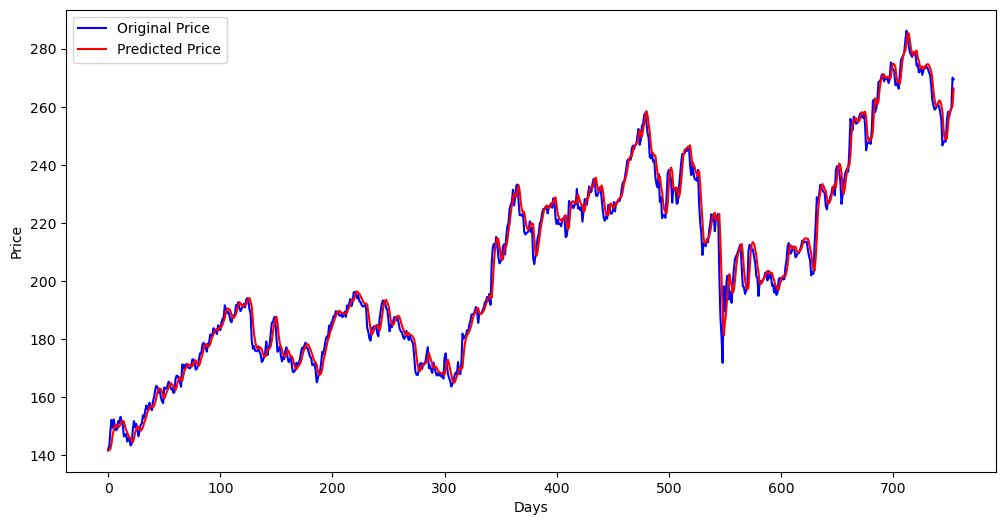

In [110]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()

(450.0, 600.0)

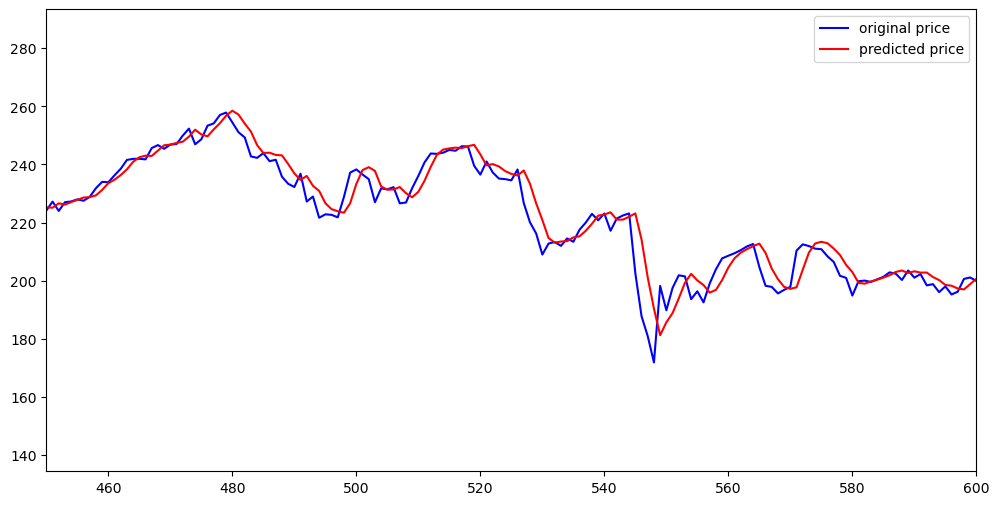

In [114]:
plt.figure(figsize=(12, 6))
plt.plot(y_test,'b',label='original price')
plt.plot(y_predicted,'r',label='predicted price')
plt.legend()
plt.xlim(450,600)

# 10.Model Evaluation.

In [119]:
from sklearn.metrics import mean_squared_error,r2_score

In [117]:
# Mean squared Error (MSE)
mse = mean_squared_error(y_test,y_predicted)
print(f'Mean Squared Error : {mse}')

Mean Squared Error : 16.317111601315393


In [118]:
# Root Mean squared Error (rmse)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error : {rmse}')

Root Mean Squared Error : 4.039444466918117


In [120]:
# R-Squared
r2 = r2_score(y_test,y_predicted)
print(f'R-Squared : {r2}')

R-Squared : 0.9856417872522445
